In [37]:
# Iris Species
# 27 Mei 2022
# Willi Sianturi

# Import library yang dibutuhkan
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split

In [38]:
iris = datasets.load_iris()
data = pd.DataFrame({
    "sl": iris.data[:, 0],
    "sw": iris.data[:, 1],
    "pl": iris.data[:, 2],
    "pw": iris.data[:, 3],
    "species": iris.target
})

data.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
X = data[["sl", "sw", "pl", "pw"]]
y = data.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

In [40]:
algorithms = {
    "KKN": KNeighborsClassifier,
    "SVM": svm.SVC,
    "LINEAR": linear_model.LinearRegression,
    "NAIVE": GaussianNB,
}

algorithms.items()

dict_items([('KKN', <class 'sklearn.neighbors._classification.KNeighborsClassifier'>), ('SVM', <class 'sklearn.svm._classes.SVC'>), ('LINEAR', <class 'sklearn.linear_model._base.LinearRegression'>), ('NAIVE', <class 'sklearn.naive_bayes.GaussianNB'>)])

In [41]:
scores = {
    "KKN": 0,
    "SVM": 0,
    "LINEAR": 0,
    "NAIVE": 0,
}

In [42]:
for name, algoritma in algorithms.items():
    algo = algoritma()
    algo.fit(X_train, y_train)
    scores[name] = algo.score(X_test, y_test)

scores

{'KKN': 0.9777777777777777,
 'SVM': 1.0,
 'LINEAR': 0.9376948060478254,
 'NAIVE': 1.0}

<AxesSubplot:ylabel='Score of Algo'>

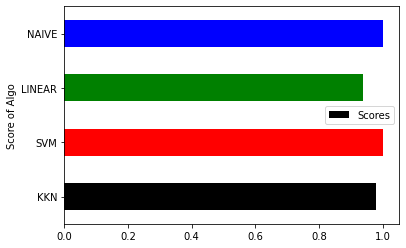

In [43]:
df = pd.DataFrame({
    "Algoritma": scores.keys(), "Scores": scores.values()
})

df.plot(
    x="Algoritma",
    y="Scores",
    kind="barh",
    xlabel="Score of Algo",
    color=["black", "red", "green", "blue"]
)